## PCA with a linear Autoencoder

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m,3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:,1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:,2] = data[:,0] * w1 + data[:,1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0,keepdims=0)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder,decoder])

autoencoder.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=0.5))

In [8]:
history = autoencoder.fit(X_train,X_train,epochs=20)

Train on 60 samples
Epoch 1/20
60/60 [==============================] - 3s 50ms/sample - loss: 0.2982
Epoch 2/20
60/60 [==============================] - 0s 200us/sample - loss: 0.2147
Epoch 3/20
60/60 [==============================] - 0s 133us/sample - loss: 0.1521
Epoch 4/20
60/60 [==============================] - 0s 150us/sample - loss: 0.1063
Epoch 5/20
60/60 [==============================] - 0s 116us/sample - loss: 0.0788
Epoch 6/20
60/60 [==============================] - 0s 133us/sample - loss: 0.0634
Epoch 7/20
60/60 [==============================] - 0s 133us/sample - loss: 0.0551
Epoch 8/20
60/60 [==============================] - 0s 133us/sample - loss: 0.0488
Epoch 9/20
60/60 [==============================] - 0s 133us/sample - loss: 0.0425
Epoch 10/20
60/60 [==============================] - 0s 133us/sample - loss: 0.0392
Epoch 11/20
60/60 [==============================] - 0s 133us/sample - loss: 0.0363
Epoch 12/20
60/60 [==============================] - 0s 134us/samp

In [9]:
codings = encoder.predict(X_train)

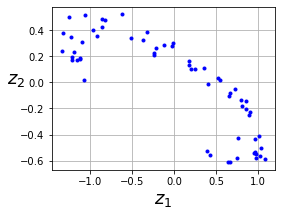

In [10]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()